In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.decomposition import PCA
import networkx as nx
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
def get_2d_df(predict_y, method='pca'):
    global norm_x
    global y
    model = None
    if method == 'pca':
        model = PCA(2)
    elif method == 'MDS':
        model = MDS()
    elif method == 'Isomap':
        model = Isomap(8)
    elif method == 'TSNE':
        model = TSNE()
    x_2d = model.fit_transform(norm_x)
    df = {
        'x0': x_2d[:, 0].squeeze().tolist(),
        'x1': x_2d[:, 1].squeeze().tolist(),
        'predict': predict_y.squeeze().tolist(),
        'y': y.astype(int).squeeze().tolist()
    }
    return pd.DataFrame(df)

In [3]:
%%R
plot <- function(df) {
#     cbPalette <- c('#009E73', '#CC79A7', '#993333', '#66FF66', '#330066', '#FF3300', '#56B4E9', '#335661')
    df$predict <- as.factor(df$predict)
    df$y <- as.factor(df$y)
    ggplot(data=df, aes(x=x0, y=x1, color=predict, shape=y)) +
        geom_point(size=4, alpha=0.6)
#         scale_colour_manual(values=cbPalette)
}

# 为了演讲, 实现一遍Clustering by fast search and find of density peaks算法

In [4]:
header = ['gender', 'age', 'weight', 'height', 'step_len_l', 'step_max_l', 'unknown_l', 'step_speed_l', 'step_freq_l',
         'stand_time_l', 'swing_time_l', 'pre_swing_time_l', 'step_len_r', 'step_max_r', 'unknown_r', 'step_speed_r',
          'step_freq_r', 'stand_time_r', 'swing_time_r', 'pre_swing_time_r', 'period', 'double_support', 'bend1_time',
         'bend2_time']
np_df = pd.read_excel('../../第一次课/totalNPdata.xlsx', names=header, dtype=np.float32)
pd_df = pd.read_excel('../../第一次课/totalPDSdat.xlsx', names=header, dtype=np.float32)

In [5]:
%%R -i np_df -i pd_df -o df
library(dplyr)
library(lattice)
library(ggplot2)
np_df <- mutate(np_df, type=0)
pd_df <- mutate(pd_df, type=1)
df <- rbind(np_df, pd_df)

In [6]:
df = df.drop(['gender'], axis=1)
df.head()

,age,weight,height,step_len_l,step_max_l,unknown_l,step_speed_l,step_freq_l,stand_time_l,swing_time_l,...,step_speed_r,step_freq_r,stand_time_r,swing_time_r,pre_swing_time_r,period,double_support,bend1_time,bend2_time,type
1,26.0,66.0,180.0,67.25,131.75,10.75,1.45,1.10,546.669983,395.0,...,1.36,0.98,605.0,400.0,100.0,965.0,210.0,64.5,59.0,0.0
2,26.0,66.0,180.0,70.00,129.75,17.00,1.34,1.04,563.330017,415.0,...,1.41,1.00,610.0,390.0,95.0,982.5,195.0,66.0,57.0,0.0
3,26.0,66.0,180.0,62.50,125.50,15.50,1.10,0.87,726.669983,440.0,...,1.13,0.89,690.0,410.0,120.0,1132.5,250.0,79.0,80.5,0.0
4,26.0,66.0,180.0,61.75,122.50,13.50,0.94,0.76,830.000000,470.0,...,0.98,0.79,805.0,470.0,150.0,1290.0,335.0,77.5,69.5,0.0
5,26.0,66.0,180.0,60.50,122.00,15.25,1.07,0.88,733.330017,425.0,...,1.16,0.92,700.0,410.0,135.0,1115.0,275.0,72.5,72.5,0.0


In [7]:
# 将数据中的标记去掉
unlabeled_df = df.drop(['type'], axis=1)
unlabeled_df.head()

,age,weight,height,step_len_l,step_max_l,unknown_l,step_speed_l,step_freq_l,stand_time_l,swing_time_l,...,unknown_r,step_speed_r,step_freq_r,stand_time_r,swing_time_r,pre_swing_time_r,period,double_support,bend1_time,bend2_time
1,26.0,66.0,180.0,67.25,131.75,10.75,1.45,1.10,546.669983,395.0,...,33.5,1.36,0.98,605.0,400.0,100.0,965.0,210.0,64.5,59.0
2,26.0,66.0,180.0,70.00,129.75,17.00,1.34,1.04,563.330017,415.0,...,24.5,1.41,1.00,610.0,390.0,95.0,982.5,195.0,66.0,57.0
3,26.0,66.0,180.0,62.50,125.50,15.50,1.10,0.87,726.669983,440.0,...,35.5,1.13,0.89,690.0,410.0,120.0,1132.5,250.0,79.0,80.5
4,26.0,66.0,180.0,61.75,122.50,13.50,0.94,0.76,830.000000,470.0,...,25.5,0.98,0.79,805.0,470.0,150.0,1290.0,335.0,77.5,69.5
5,26.0,66.0,180.0,60.50,122.00,15.25,1.07,0.88,733.330017,425.0,...,31.5,1.16,0.92,700.0,410.0,135.0,1115.0,275.0,72.5,72.5


In [8]:
# 标记数据
x = unlabeled_df.as_matrix()
y = df['type'].as_matrix().reshape((-1, 1))
x.shape, y.shape

((384, 23), (384, 1))

In [9]:
# 对于x中的每一列进行normalization以减少数据的数量级对距离的影响
norm_x = x.copy()
col_max = np.max(x, axis=0)
col_min = np.min(x, axis=0)
for i in range(norm_x.shape[1]):
    norm_x[:, i] = (norm_x[:, i] - col_min[i]) / (col_max[i] - col_min[i])
for i in range(norm_x.shape[0]):
    for j in range(norm_x.shape[1]):
        assert((norm_x[i, j] >= 0) and (norm_x[i, j] <= 1))
decomposed_x = PCA(2).fit_transform(norm_x)
print(decomposed_x.shape)

(384, 2)


In [10]:
norm_x.shape

(384, 23)

In [11]:
from sklearn import metrics
def assess(predict_y, y, method='all'):
    '''
    @param:
        -predict_y: Should be the predicted data using clustering algorithm, and its dim should be m * 1
        -y: Original labeled data, and its dim also should be m * 1
        -method: Which metric will be used to measure the performance of the clustering algorithm
    '''
    m = len(predict_y)
    a, b, c, d = 0, 0, 0, 0
    flag1, flag2 = None, None
    # calculate a, b, c and d
    for j in range(m):
        for i in range(j):
            flag1 = (predict_y[i] == predict_y[j])
            flag2 = (y[i] == y[j])
            if flag1 and flag2:
                a += 1
            if flag1 and (not flag2):
                b += 1
            if (not flag1) and flag2:
                c += 1
            if (not flag1) and (not flag2):
                d += 1
    if method == 'all':
        return [metrics.fowlkes_mallows_score(y, predict_y), 
                metrics.adjusted_mutual_info_score(y, predict_y),
                metrics.adjusted_rand_score(y, predict_y),
                metrics.v_measure_score(y, predict_y)]
    if method == 'JC':
        return a / (a + b + c)
    if method == 'FMI':
        return np.sqrt((a / (a + b + 0.0001)) * (a / (a + c + 0.0001)))
    if method == 'RI':
        return metrics.adjusted_rand_score(y, predict_y)  

In [12]:
def visualize(labels):
    global decomposed_x
    global y
    ones = np.argwhere(labels == 1)[:, 0]
    zeros = np.argwhere(labels == 0)[:, 0]
    print(ones.shape, zeros.shape)
    plt.subplot(211)
    plt.scatter(decomposed_x[ones, 0], decomposed_x[ones, 1], color='darkviolet', alpha=.5)
    plt.scatter(decomposed_x[zeros, 0], decomposed_x[zeros, 1], color='springgreen', alpha=.5)
    plt.title('Clustering Result')
    ones = np.argwhere(y == 1)
    zeros = np.argwhere(y == 0)
    print(ones.shape, zeros.shape)
    plt.subplot(212)
    plt.scatter(decomposed_x[ones, 0], decomposed_x[ones, 1], color='darkviolet', alpha=.5)
    plt.scatter(decomposed_x[zeros, 0], decomposed_x[zeros, 1], color='springgreen', alpha=.5)

### 在Kmeans中，由于给聚类中心分配的数据点都是球状分布在聚类中心周围的，这样对于那些非球状分布的数据点来说是有很大不足的
### 对于非规则性分布在聚类中心周围的数据点, 可以使用基于局部密度的算法实现, 如DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
### 在上述基于局部密度的方法中, 要求人工选定一个threshold, 密度小于这个值的数据点都当做噪声丢弃掉。然而, 挑选一个适合的threshold是非常难的¶
### 此方法类似于K-medoids。就像DBSCAN和Mean Shift一样, 此方法可以找出非球状分布的聚类，并且能自动确定聚类数
### 就想Mean Shift一样, 聚类中心被定义为数据点的局部密度取最大值的地方, 但是** 此方法不需要Mean Shift那种将数据点嵌入到Vector Space, 然后最大化每个数据点的密度???**

## 本算法的假设！！:
- 聚类中心被局部密度相对较低的数据点包围
- 聚类中心距离任何一个有更高的局部距离的数据点都相对较远

## 对于每个数据点, 计算两个属性:
- 

In [13]:
d_c = 0.2
# 距离矩阵
D = np.zeros((x.shape[0], x.shape[0]))

In [14]:
gamma = 0.15
for i in range(D.shape[0]):
    for j in range(i):
        D[i, j] = np.sum((norm_x[i, :] - norm_x[j, :])**2)
        D[j, i] = D[i, j]

### 如果我把距离矩阵改为图中的距离呢？

In [15]:
G = nx.Graph()
G.add_nodes_from(range(D.shape[0]))
k = 5
weights = []
for i in range(D.shape[0]):
    distance = D[i, :]
    arg_sort_dist = np.argsort(distance)
    arg_sort_dist = arg_sort_dist[:5]
    for j in arg_sort_dist.tolist():
        weights.append((i, j, D[i, j]))
G.add_weighted_edges_from(weights)

In [16]:
shortest_path_lens = nx.algorithms.shortest_path_length(G, weight='weight')
D_graph = np.zeros(D.shape)
for i in range(D_graph.shape[0]):
    for j in shortest_path_lens[i]:
        D_graph[i, j] = shortest_path_lens[i][j]

In [17]:
#计算P矩阵
P = np.zeros((1, D.shape[0]))
for i in range(P.shape[1]):
    P[0, i] = np.sum(D[i, :] < d_c)
#     P[0, i] = np.sum(D_graph[i, :] < d_c)

In [18]:
np.argsort(-P)

array([[260, 182,  85,  57, 307,  84,  47, 181, 163,  30,  58,  98, 161,
         62,  63, 130, 111, 227, 112, 122, 124, 308,  99, 160, 301, 186,
        192, 306, 326, 123, 205, 203, 131, 299,  45,  13, 171,  61, 302,
        138, 121, 202, 125,   5, 346, 162, 337, 129,  52, 300, 232, 305,
        348, 293, 180, 113, 114, 226, 245, 347, 297, 255,  25, 334,  39,
        172, 225, 115, 233, 179, 236, 253, 298,  24, 144, 132, 336, 198,
        327,  88, 169, 316,  68,  46, 239, 309, 119,  56,  27, 237, 100,
        208, 296,  49, 333, 240, 340, 140,  97, 151, 356,  29,   4,  53,
         67,  89, 277, 104, 206, 230, 238, 201, 278, 352, 335, 158,  43,
        358, 244, 118,  41,  18, 259,  51,  80,  87, 339, 292, 173,  50,
        184, 183, 117, 139, 276,  69,  20, 338, 116, 120,  11, 195, 280,
        128,  22, 167, 294, 375, 159, 101, 357, 281,  38,  44, 209, 228,
          2, 291, 381, 153, 133, 103, 382, 219, 349, 231, 178, 221, 210,
         95,   1,  76, 127, 285, 377,  91, 380, 364

In [19]:
# 计算delta
Delta = np.ones((1, D.shape[0])) * 9999
for i in range(D.shape[0]):
    for j in range(D.shape[0]):
        if P[0, j] > P[0, i]:
            Delta[0, i] = min(Delta[0, i], D[i, j])
max_cord = np.argmax(P)
Delta[0, max_cord] = np.max(D[max_cord, :])

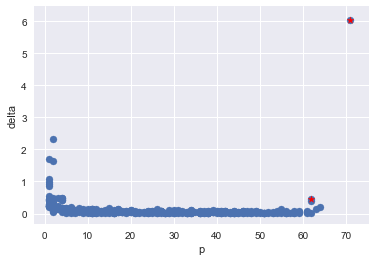

In [20]:
plt.scatter(y=Delta.T, x=P.T)
plt.scatter(P[0, 260], Delta[0, 260], color='red', marker='*')
plt.scatter(P[0, 57], Delta[0, 57], color='red', marker='*')
plt.xlabel('p')
plt.ylabel('delta')

In [21]:
# 取出聚类中心, 具体做法是求出(p+delta)^2最大的点
P_plus_Delta = np.zeros(P.shape)
P_plus_Delta = P * Delta
arg_max = np.argsort(-P_plus_Delta).squeeze()[:2]
print(arg_max)

[260  57]


In [22]:
# 将每一个点归类
ord_labels = np.zeros((1, D.shape[0]), dtype=int)
for i in range(D.shape[0]):
    distances = np.ones(arg_max.shape) * 9999
    for j, max_cord in enumerate(arg_max):
        distances[j] = D[max_cord, i]
    ord_labels[0, i] = np.argmin(distances)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_x = pca.fit_transform(norm_x)
print(pca_x.shape)

(384, 2)


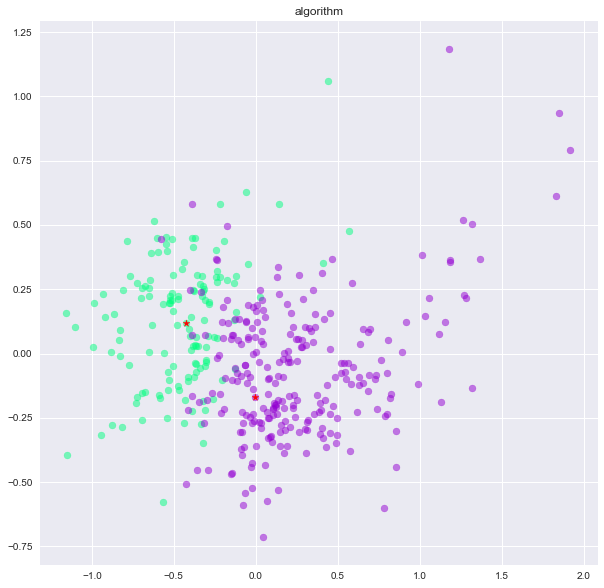

In [26]:
#purple is one对应260
plt.figure(figsize=(10, 10))
ones = np.argwhere(ord_labels == 1)[:, 1]
zeros = np.argwhere(ord_labels == 0)[:, 1]
plt.title('algorithm')
plt.scatter(pca_x[ones, 0], pca_x[ones, 1], color='springgreen', alpha=.5)
plt.scatter(pca_x[zeros, 0], pca_x[zeros, 1], color='darkviolet', alpha=.5)
plt.scatter(pca_x[57, 0], pca_x[57, 1], color='red', marker='*')
plt.scatter(pca_x[260, 0], pca_x[260, 1], color='red', marker='*')
# plt.scatter(pca_x[])
# plt.subplot(212)
# plt.title('original')
# ones = np.argwhere(y == 1)[:, 0]
# zeros = np.argwhere(y == 0)[:, 0]
# plt.scatter(decomposed_x[ones, 0], decomposed_x[ones, 1], color='darkviolet', alpha=.5)
# plt.scatter(decomposed_x[zeros, 0], decomposed_x[zeros, 1], color='springgreen', alpha=.5)

In [28]:
assess(ord_labels.squeeze().tolist(), y.squeeze().tolist())

D:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


[1.1979140235324686,
 0.25102224276463264,
 0.22663504160791784,
 0.25931576884257329]

In [307]:
# 去掉噪点
zeros_borders = []
ones_borders = []
zeros_borders_p = []
ones_borders_p = []
# 先在0中找与1中心的距离小于d_c的
for i in zeros:
    if D[260, i]< d_c:
        zeros_borders.append(i)
        zeros_borders_p.append(P[0, i])
for i in ones:
    if D[57, i] < d_c:
        ones_borders.append(i)
        ones_borders_p.append(P[0, i])

In [309]:
one_p_b = np.max(ones_borders_p)
zero_p_b = np.max(zeros_borders_p)
print(one_p_b, zero_p_b)

62.0 71.0


In [311]:
one_cores = []
one_borders = []
zero_cores = []
zero_borders = []
for i in ones:
    if P[0, i] >= one_p_b:
        one_cores.append(i)
    else:
        ones_borders.append(i)
for i in zeros:
    if P[0, i] >= one_p_b:
        zero_cores.append(i)
    else:
        zero_borders.append(i)

In [471]:
G = nx.Graph()
G.add_nodes_from(range(D.shape[0]))
k = 5
weights = []
for i in range(D.shape[0]):
    distance = D[i, :]
    arg_sort_dist = np.argsort(distance)
    arg_sort_dist = arg_sort_dist[:5]
    for j in arg_sort_dist.tolist():
        weights.append((i, j, D[i, j]))
G.add_weighted_edges_from(weights)

In [472]:
shortest_path_lens = nx.algorithms.shortest_path_length(G, weight='weight')
D_graph = np.zeros(D.shape)
for i in range(D_graph.shape[0]):
    for j in shortest_path_lens[i]:
        D_graph[i, j] = shortest_path_lens[i][j]

# 高斯核函数
# sigma = 1
# D_gaussian = np.zeros(D.shape)
# for i in range(D_gaussian.shape[0]):
#     for j in range(i):
#         D_gaussian[i, j] = np.exp(-np.sum((norm_x[i, :] - norm_x[j, :])**2) / (2 * sigma**2))
#         D_gaussian[j, i] = D_gaussian[i, j]

In [449]:
a = np.array([1, 2, 5, 2, 1])
np.sort(a)

array([1, 1, 2, 2, 5])

In [484]:
#计算P矩阵
d_c = 0.2
P = np.zeros((1, D.shape[0]))
for i in range(P.shape[1]):
    P[0, i] = np.sum(D_graph[i, :] < d_c)
#     P[0, i] = np.sum(D_gaussian[i, :] < d_c)
#     P[0, i] = 1 / np.sum(D_gaussian[np.argsort(-D_graph[i, :])[:5], i])

In [485]:
P

array([[ 31.,  44.,  42.,  28.,  44.,  50.,  22.,  22.,  20.,  17.,   8.,
         42.,  37.,  64.,   1.,  30.,  10.,  11.,  41.,  29.,  36.,  29.,
         38.,  32.,  64.,  61.,  22.,  42.,   1.,  50.,  68.,  35.,  31.,
         13.,   9.,   4.,   2.,   2.,  35.,  57.,  19.,  36.,   7.,  35.,
         35.,  39.,  41.,  40.,  12.,  23.,  26.,  55.,  65.,  46.,  33.,
         35.,  51.,  77.,  76.,  10.,  26.,  66.,  69.,  69.,  12.,  14.,
         13.,  21.,  22.,  21.,   6.,   6.,   5.,  33.,  28.,   9.,  22.,
         24.,  17.,  24.,  42.,   4.,  11.,  16.,  50.,  50.,  25.,  47.,
         64.,  64.,  50.,  39.,  19.,  40.,  10.,  10.,  10.,  11.,  61.,
         63.,  57.,  27.,  22.,  18.,  38.,  28.,  29.,   9.,  12.,   7.,
         35.,  63.,  64.,  43.,  43.,  42.,  34.,  37.,  38.,  29.,  25.,
         70.,  62.,  65.,  69.,  73.,  38.,  35.,  37.,  62.,  65.,  62.,
         58.,  46.,  11.,  11.,  11.,  12.,  67.,  40.,  53.,   2.,   3.,
          2.,  42.,  41.,  18.,  17., 

In [486]:
# 计算delta
Delta = np.ones((1, D.shape[0])) * 9999
for i in range(D.shape[0]):
    for j in range(D.shape[0]):
        if P[0, j] > P[0, i]:
            Delta[0, i] = min(Delta[0, i], D_graph[i, j])
#             Delta[0, i] = min(Delta[0, i], D_gaussian[i, j])
max_cord = np.argmax(P)
Delta[0, max_cord] = np.max(D_graph[max_cord, :])
# Delta[0, max_cord] = np.max(D_gaussian[max_cord, :])

In [487]:
# 取出聚类中心, 具体做法是求出(p+delta)^2最大的点
P_plus_Delta = np.zeros(P.shape)
P_plus_Delta = P * Delta
arg_max = np.argsort(-P_plus_Delta).squeeze()[:3]
print(arg_max)

[ 57 163 260]


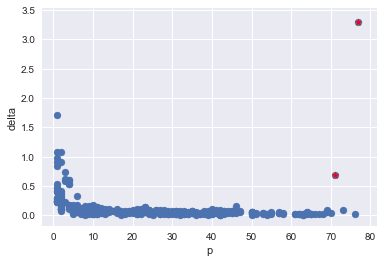

In [489]:
plt.scatter(y=Delta.T, x=P.T)
plt.scatter(P[0, 163], Delta[0, 163], color='red', marker='*')
plt.scatter(P[0, 57], Delta[0, 57], color='red', marker='*')
plt.xlabel('p')
plt.ylabel('delta')

In [490]:
# 取出聚类中心, 具体做法是求出(p+delta)^2最大的点
P_plus_Delta = np.zeros(P.shape)
P_plus_Delta = P * Delta
arg_max = np.argsort(-P_plus_Delta).squeeze()[:2]
print(arg_max)

[ 57 163]


In [495]:
# 将每一个点归类
g_CFS_labels = np.zeros((1, D.shape[0]), dtype=int)
for i in range(D.shape[0]):
    distances = np.ones(arg_max.shape) * 9999
    for j, max_cord in enumerate(arg_max):
        distances[j] = D_gaussian[max_cord, i]
    g_CFS_labels[0, i] = np.argmin(distances)

In [492]:
labels

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

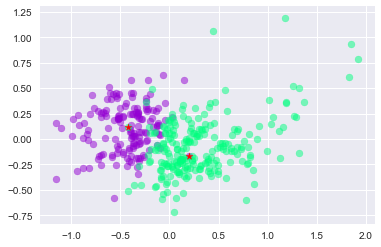

In [494]:
ones = np.argwhere(labels == 1)[:, 1]
zeros = np.argwhere(labels == 0)[:, 1]
plt.scatter(pca_x[ones, 0], pca_x[ones, 1], color='darkviolet', alpha=.5)
plt.scatter(pca_x[zeros, 0], pca_x[zeros, 1], color='springgreen', alpha=.5)
plt.scatter(pca_x[57, 0], pca_x[57, 1], color='red', marker='*')
plt.scatter(pca_x[163, 0], pca_x[163, 1], color='red', marker='*')

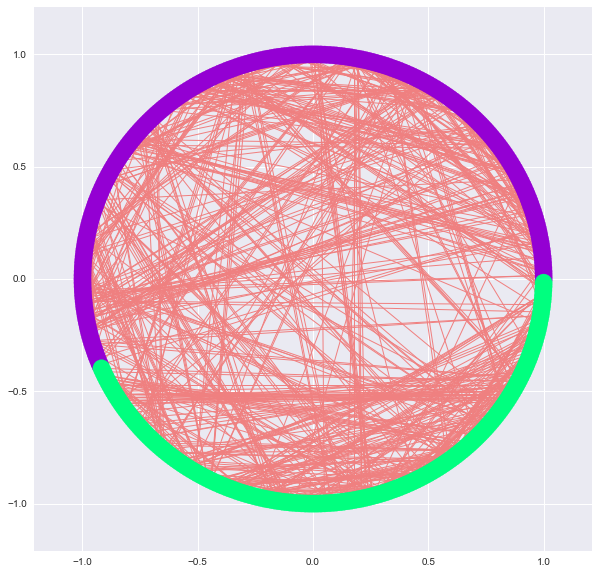

In [327]:
plt.figure(figsize=(10, 10))
colors = []
for i in y.squeeze():
    if i == 0:
        colors.append('darkviolet')
    else:
        colors.append('springgreen')
nx.draw_networkx(G, pos=nx.shell_layout(G), node_color=colors, edge_color='lightcoral', with_labels=False)

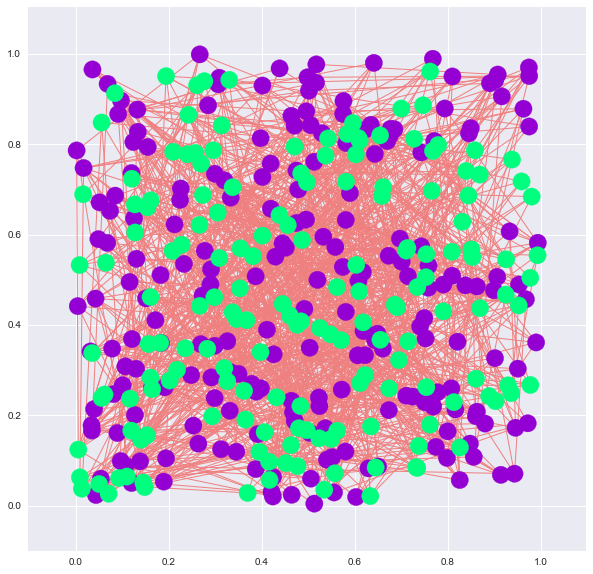

In [328]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos=nx.random_layout(G), node_color=colors, edge_color='lightcoral', with_labels=False)

## 2. Mean Shift

In [496]:
df = {
    'x0': decomposed_x[:, 0],
    'x1': decomposed_x[:, 1],
    'y': y.squeeze()
}
df = pd.DataFrame(df)

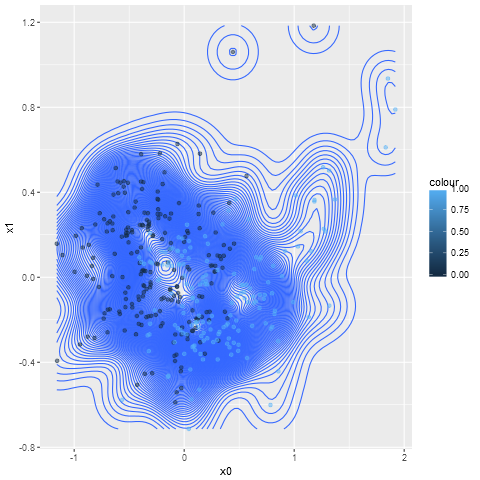

In [502]:
%%R -i df
ggplot(df, aes(x=x0, y=x1)) + stat_density2d(binwidth=0.01) + geom_point(alpha=0.5, aes(color=y))

In [503]:
from sklearn.cluster import MeanShift
# 改变bindwidth值, 即圆的半径来观察得到的结果
meanshift = MeanShift(bandwidth=0.01)
ms_predict = meanshift.fit_predict(norm_x).reshape((-1, 1))
scores = assess(predict.squeeze().tolist(), y.squeeze().tolist())

In [504]:
df = get_2d_df(predict)

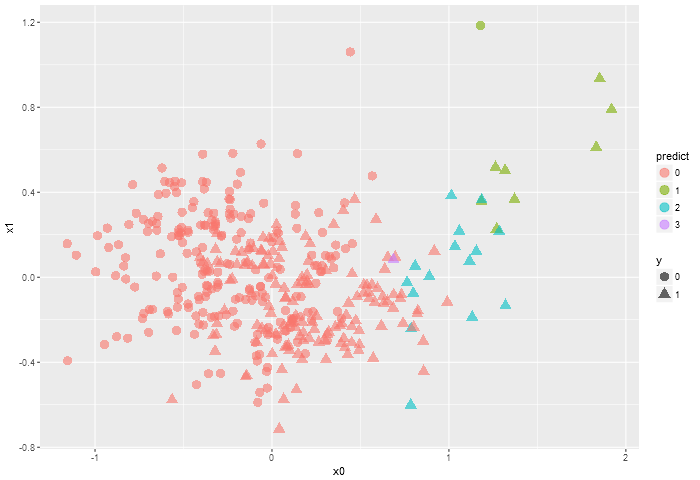

In [505]:
%%R -i df -w 700
plot(df)

## AP

In [506]:
from sklearn.cluster import AffinityPropagation

In [507]:
ap = AffinityPropagation()
ap_x = ap.fit_predict(norm_x).reshape((-1, 1))

In [508]:
df = get_2d_df(ap_x)

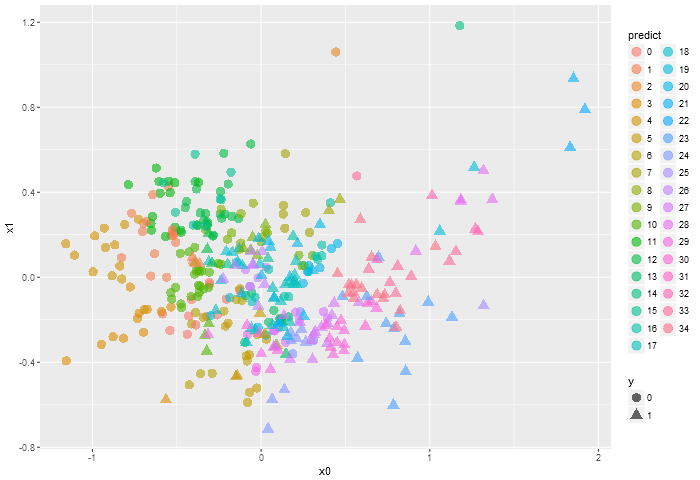

In [509]:
%%R -i df -w 700
plot(df)

In [537]:
#和kmean对比
from sklearn.cluster import KMeans
# 我将使用不同的参数运行KMeans算法, 并计算上面定义的三个score
kmeans1 = KMeans(n_clusters=2, init='k-means++', n_init=2)
y1 = kmeans1.fit_predict(norm_x).reshape((-1, 1))

In [567]:
scores = []
scores_yy = []
for y_p in [g_CFS_labels, ord_labels, ms_predict, ap_x, y1]:
    y_p = y_p.squeeze().tolist()
    yy = y.copy()
    yy[y == 0] = 1
    yy[y == 1] = 0
    scores.append(assess(y_p, y.squeeze().tolist()))
    scores_yy.append(assess(y_p, yy.squeeze().tolist()))
scores = np.array(scores)
scores.shape

D:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.
D:\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: invalid value encountered in sqrt
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


(5, 4)

In [565]:
scores, scores_yy

(array([[  1.26149016e+00,   2.06985062e-01,   2.22246847e-01,
           2.09907069e-01],
        [             nan,   7.11896183e-03,   4.83913314e-03,
           1.79234815e-02],
        [  0.00000000e+00,   5.59539273e-14,   0.00000000e+00,
           2.06365091e-01],
        [  1.99856558e-01,   8.51223508e-02,   3.38613560e-02,
           1.63963288e-01],
        [  1.31110470e+00,   1.95535548e-01,   2.69041740e-01,
           1.98260255e-01]]),
 [[1.2614901571957144,
   0.20698506229427457,
   0.22224684730377681,
   0.20990706944744292],
  [nan, 0.0071189618297226569, 0.0048391331370494662, 0.017923481515426647],
  [0.0, 5.3002326030351858e-14, 0.0, 0.20636509075486417],
  [0.19985655775907182,
   0.085122350804121394,
   0.03386135601905578,
   0.16396328786765715],
  [1.3111046981743257,
   0.19553554797666395,
   0.26904173954676275,
   0.19826025495142147]])

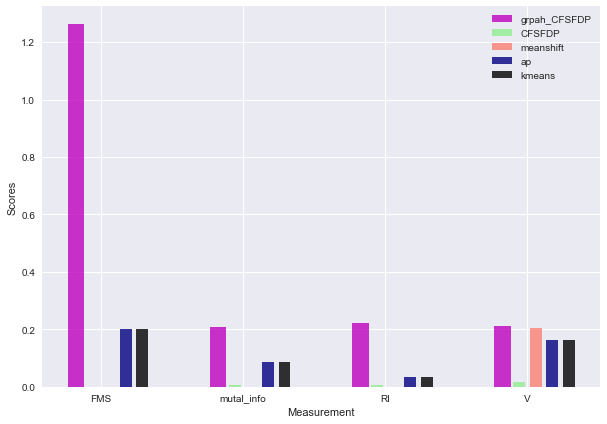

In [568]:
bar_width = 0.35
plt.figure(figsize=(10, 7))
rects1 = plt.bar(np.arange(0, 12, 3), scores[0, :], width=bar_width, alpha=0.8, color='m', label='grpah_CFSFDP')
rects2 = plt.bar(np.arange(0, 12, 3)+bar_width, scores[1, :], width=bar_width-0.1, alpha=0.8, color='lightgreen',label='CFSFDP')
rects3 = plt.bar(np.arange(0, 12, 3)+2*bar_width, scores[2, :], width=bar_width-0.1, alpha=0.8, color='salmon',label='meanshift')
rects4 = plt.bar(np.arange(0, 12, 3)+3*bar_width, scores[3, :], width=bar_width-0.1, alpha=0.8, color='navy',label='ap')
rects5 = plt.bar(np.arange(0, 12, 3)+4*bar_width, scores[3, :], width=bar_width-0.1, alpha=0.8, color='black',label='kmeans')
plt.xlabel('Measurement')
plt.ylabel('Scores')
plt.xticks(np.arange(0, 12, 3) + 1.5*bar_width, ('FMS', 'mutal_info', 'RI', 'V'))
plt.legend()